In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

In [128]:
start='2010-01-01'
end=dt.datetime.today()
#TWTR = yf.Ticker('AAPL')
# ticker =  TWTR.history(period='1y')[['Open', 'High', 'Low', 'Close', 'Volume']]
# TWTR.info
df=yf.download('HDFCBANK.NS',start=start,end=end)
print(df)
# df.head()
# df.tail()

[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04   170.000000   172.850006   169.255005   170.570007   153.989578   
2010-01-05   171.000000   172.500000   170.500000   170.720001   154.124954   
2010-01-06   171.399994   172.000000   168.809998   170.835007   154.228821   
2010-01-07   176.839996   176.839996   170.160004   171.279999   154.630585   
2010-01-08   171.199997   172.339996   170.100006   171.505005   154.833694   
...                 ...          ...          ...          ...          ...   
2023-12-01  1557.900024  1565.750000  1552.099976  1555.400024  1555.400024   
2023-12-04  1588.000000  1612.000000  1573.650024  1609.400024  1609.400024   
2023-12-05  1636.500000  1639.000000  1616.500000  1623.699951  1623.699951   
2023-12-06  1638.449951  1638.449951  1616.650024  1627.800049

In [129]:
# df=df.reset_index()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,170.000000,172.850006,169.255005,170.570007,153.989578,3050490
2010-01-05,171.000000,172.500000,170.500000,170.720001,154.124954,8386600
2010-01-06,171.399994,172.000000,168.809998,170.835007,154.228821,6639840
2010-01-07,176.839996,176.839996,170.160004,171.279999,154.630585,6123980
2010-01-08,171.199997,172.339996,170.100006,171.505005,154.833694,7085900


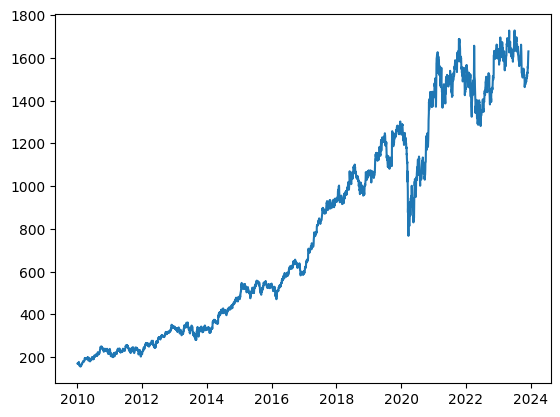

In [130]:
plt.plot(df[['Close']])

In [131]:
# df

ma100=df.Close.rolling(100).mean()
ma100[1:]

Date
2010-01-05            NaN
2010-01-06            NaN
2010-01-07            NaN
2010-01-08            NaN
2010-01-11            NaN
                 ...     
2023-12-01    1574.205002
2023-12-04    1573.695002
2023-12-05    1573.367502
2023-12-06    1573.161503
2023-12-07    1573.136503
Name: Close, Length: 3438, dtype: float64

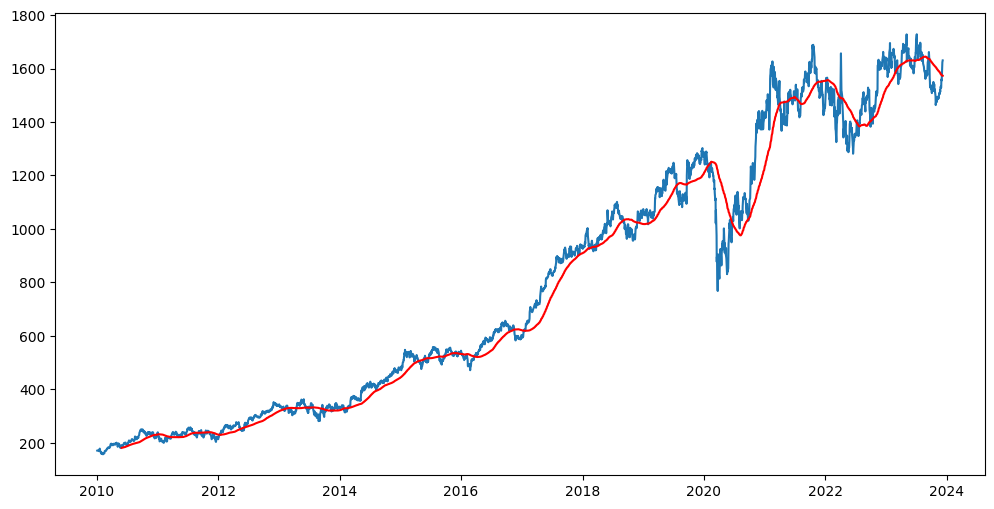

In [132]:
plt.figure(figsize=(12,6))
plt.plot(df[['Close']])
plt.plot(ma100,'r')

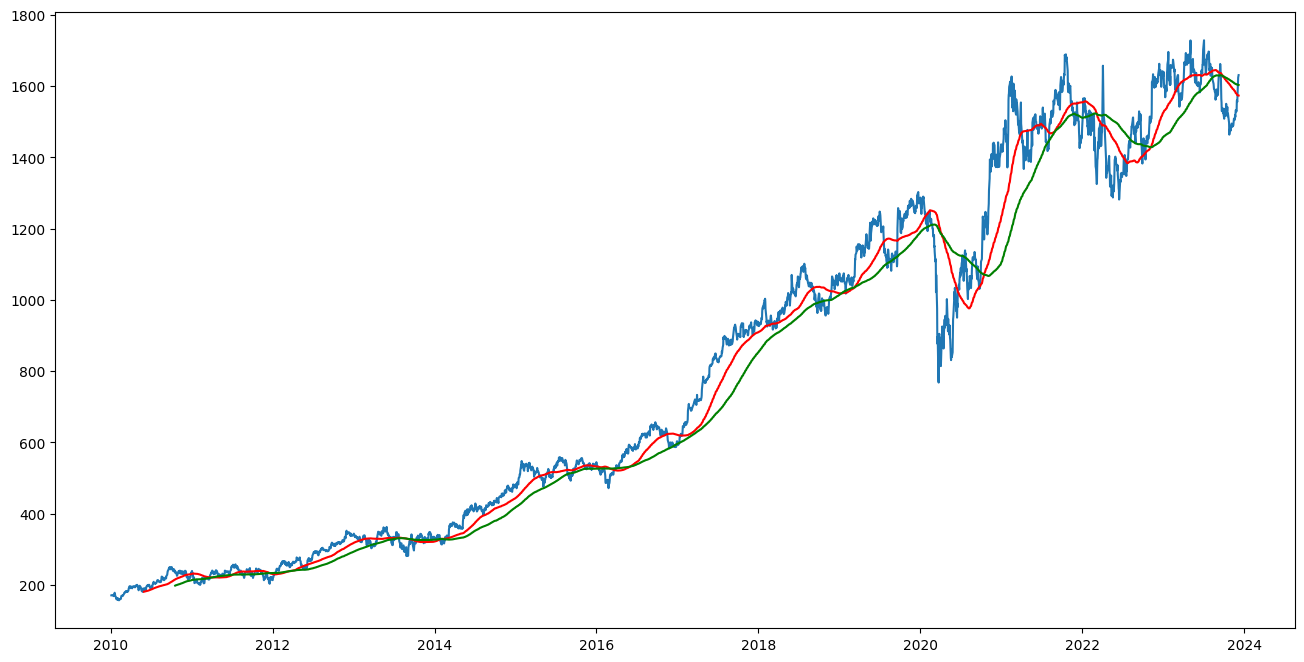

In [133]:
ma200=df.Close.rolling(200).mean()
plt.figure(figsize=(16,8))
plt.plot(df[['Close']])
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [134]:
df.shape

(3439, 6)

In [135]:
training_dt=pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
test_dt=pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])
test_date=pd.DataFrame(df.index[int(len(df)*0.7):int(len(df))])
predict_date=pd.DataFrame(df.index[int(len(df)*0.7):int(len(df))])

print(training_dt.shape)
print(test_dt.shape)

(2407, 1)
(1032, 1)


In [136]:
training_dt.head()

,Close
Date,
2010-01-04,170.570007
2010-01-05,170.720001
2010-01-06,170.835007
2010-01-07,171.279999
2010-01-08,171.505005


In [137]:
test_dt.head()

,Close
Date,
2019-10-11,1198.800049
2019-10-14,1204.400024
2019-10-15,1223.050049
2019-10-16,1221.099976
2019-10-17,1220.000000


In [138]:
scaler=MinMaxScaler(feature_range=(0,1))
training_dt_arr=scaler.fit_transform(training_dt)
training_dt_arr

array([[0.0125669 ],
       [0.0127032 ],
       [0.0128077 ],
       ...,
       [0.93607511],
       [0.97355774],
       [0.94847848]])

In [139]:
test_dt_arr=scaler.fit_transform(test_dt)
test_dt_arr

array([[0.4488288 ],
       [0.45465907],
       [0.47407607],
       ...,
       [0.89120249],
       [0.8954712 ],
       [0.89823008]])

In [140]:
x_train=[]
y_train=[]

for i in range(100,training_dt_arr.shape[0]):
    x_train.append(training_dt_arr[i-100:i])
    y_train.append(training_dt_arr[i,0])
    
x_train ,y_train=np.array(x_train),np.array(y_train)

In [141]:
#ML MODEL

In [142]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
from keras import backend as K


In [143]:
model=Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

In [144]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_13 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_14 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_15 (LSTM)              (None, 120)              

In [145]:
# def root_mean_squared_error(y_true, y_pred):
#         return K.sqrt(K.mean(K.square(y_pred - y_true))) 

# model.compile(optimizer = "adam", loss = root_mean_squared_error)
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
73/73 [==============================] - 22s 200ms/step - loss: 0.0331
Epoch 2/50
73/73 [==============================] - 18s 244ms/step - loss: 0.0076
Epoch 3/50
73/73 [==============================] - 15s 209ms/step - loss: 0.0064
Epoch 4/50
73/73 [==============================] - 17s 237ms/step - loss: 0.0055
Epoch 5/50
73/73 [==============================] - 18s 242ms/step - loss: 0.0053
Epoch 6/50
73/73 [==============================] - 16s 225ms/step - loss: 0.0046
Epoch 7/50
73/73 [==============================] - 16s 221ms/step - loss: 0.0045
Epoch 8/50
73/73 [==============================] - 16s 221ms/step - loss: 0.0043
Epoch 9/50
73/73 [==============================] - 16s 226ms/step - loss: 0.0049
Epoch 10/50
73/73 [==============================] - 17s 232ms/step - loss: 0.0044
Epoch 11/50
73/73 [==============================] - 15s 200ms/step - loss: 0.0038
Epoch 12/50
73/73 [==============================] - 18s 244ms/step - loss: 0.0039
Epoch 13/50
7

In [146]:
model.save('stock_model.keras')

In [147]:
past_100_days=training_dt.tail(100)
final_df=pd.concat([past_100_days,test_dt])

In [148]:
final_df.head()

,Close
Date,
2019-05-15,1143.349976
2019-05-16,1155.324951
2019-05-17,1181.050049
2019-05-20,1216.175049
2019-05-21,1201.849976


In [149]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.39109837],
       [0.40356581],
       [0.43034884],
       ...,
       [0.89120249],
       [0.8954712 ],
       [0.89823008]])

In [150]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [151]:
# print(x_test)
# print(y_test)
x_test=np.array(x_test)
y_test=np.array(y_test)

print(x_test)
print(y_test)

[[[0.39109837]
  [0.40356581]
  [0.43034884]
  ...
  [0.43643939]
  [0.47938578]
  [0.45065077]]

 [[0.40356581]
  [0.43034884]
  [0.46691834]
  ...
  [0.47938578]
  [0.45065077]
  [0.4488288 ]]

 [[0.43034884]
  [0.46691834]
  [0.45200416]
  ...
  [0.45065077]
  [0.4488288 ]
  [0.45465907]]

 ...

 [[0.92529932]
  [0.91691834]
  [0.90083289]
  ...
  [0.82363361]
  [0.82009377]
  [0.87631449]]

 [[0.91691834]
  [0.90083289]
  [0.90931808]
  ...
  [0.82009377]
  [0.87631449]
  [0.89120249]]

 [[0.90083289]
  [0.90931808]
  [0.91285793]
  ...
  [0.87631449]
  [0.89120249]
  [0.8954712 ]]]
[0.4488288  0.45465907 0.47407607 ... 0.89120249 0.8954712  0.89823008]


In [152]:
#MAKING PREDICTION

y_predicted=model.predict(x_test)

33/33 [==============================] - 3s 76ms/step


In [153]:
y_predicted.shape

(1032, 1)

In [154]:
y_test

array([0.4488288 , 0.45465907, 0.47407607, ..., 0.89120249, 0.8954712 ,
       0.89823008])

In [155]:
y_predicted
# x2_index=[]
# for j in range(0,len(y_predicted)):
#     x2_index.append(j)
    
# x2_index

array([[0.44150165],
       [0.44692487],
       [0.45135397],
       ...,
       [0.7718245 ],
       [0.776965  ],
       [0.78311753]], dtype=float32)

In [156]:
scaler.scale_

array([0.00104112])

In [157]:
# scale_factor=1/(scaler.scale_)
# y_predicted=y_predicted*scale_factor
# y_test=y_test*scale_factor
# y_train=y_train*scale_factor
# y_test=np.reshape(-1,1)
# y_train=np.reshape(-1,1)
y_test=pd.DataFrame(y_test)
y_train=pd.DataFrame(y_train)
y_predicted=scaler.inverse_transform(y_predicted)
y_test=scaler.inverse_transform(y_test)
y_train=scaler.inverse_transform(y_train)

print(y_predicted)
print(y_test)
print(y_train)

[[1191.7623]
 [1196.9713]
 [1201.2255]
 ...
 [1509.0374]
 [1513.9749]
 [1519.8843]]
[[1198.80004883]
 [1204.40002441]
 [1223.05004883]
 ...
 [1623.69995117]
 [1627.80004883]
 [1630.44995117]]
[[ 792.80980024]
 [ 792.63087933]
 [ 797.21732734]
 ...
 [1666.80010238]
 [1702.80215841]
 [1678.71353132]]


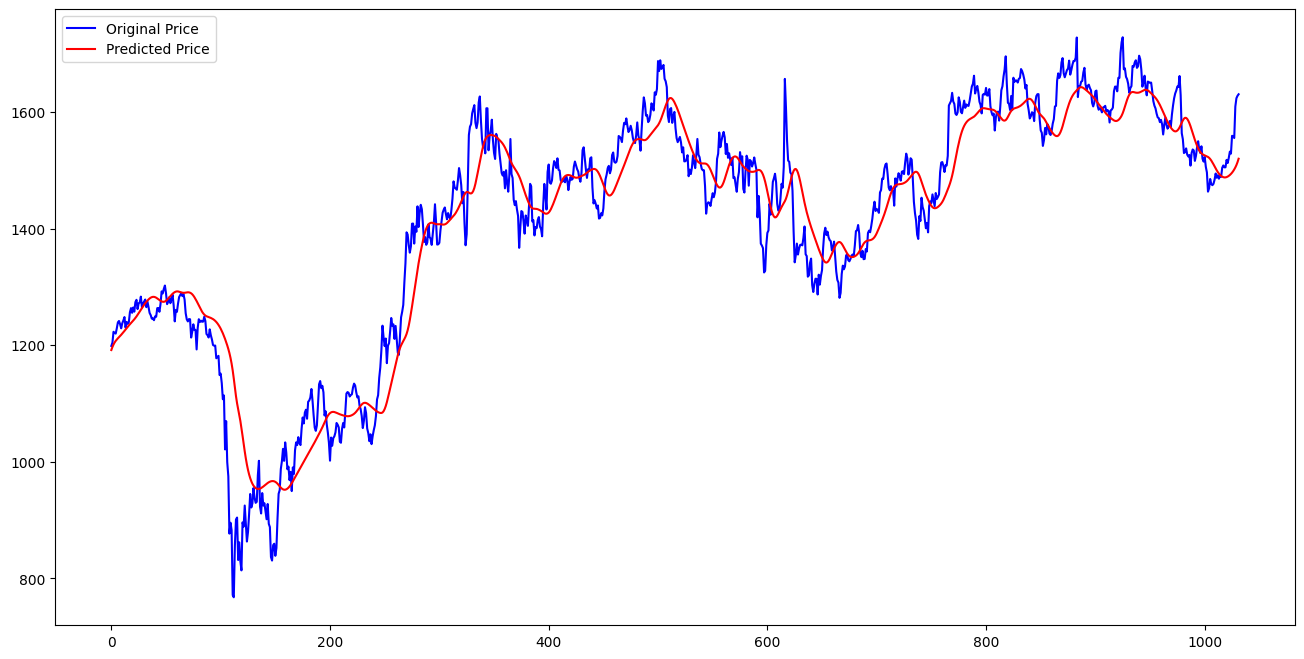

In [158]:
plt.figure(figsize=(16,8))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
# plt.xticks()
# plt.plot(y_train,'g',label='Training Price')
# plt.xlabel('Time')
# plt.ylabel('Price')
plt.legend()
plt.show()

In [159]:
y_predicted=pd.DataFrame(y_predicted)
predict_date['Close']=y_predicted
predict_date.set_index('Date',inplace=True)
print(y_predicted.head())
print(predict_date.head())

             0
0  1191.762329
1  1196.971313
2  1201.225464
3  1204.673950
4  1207.493530
                  Close
Date                   
2019-10-11  1191.762329
2019-10-14  1196.971313
2019-10-15  1201.225464
2019-10-16  1204.673950
2019-10-17  1207.493530


In [160]:
y_test=pd.DataFrame(y_test)
y_test.reset_index()
print(y_test.head())
test_date['Close']=y_test
test_date.set_index('Date',inplace=True)
print(test_date.head())

             0
0  1198.800049
1  1204.400024
2  1223.050049
3  1221.099976
4  1220.000000
                  Close
Date                   
2019-10-11  1198.800049
2019-10-14  1204.400024
2019-10-15  1223.050049
2019-10-16  1221.099976
2019-10-17  1220.000000


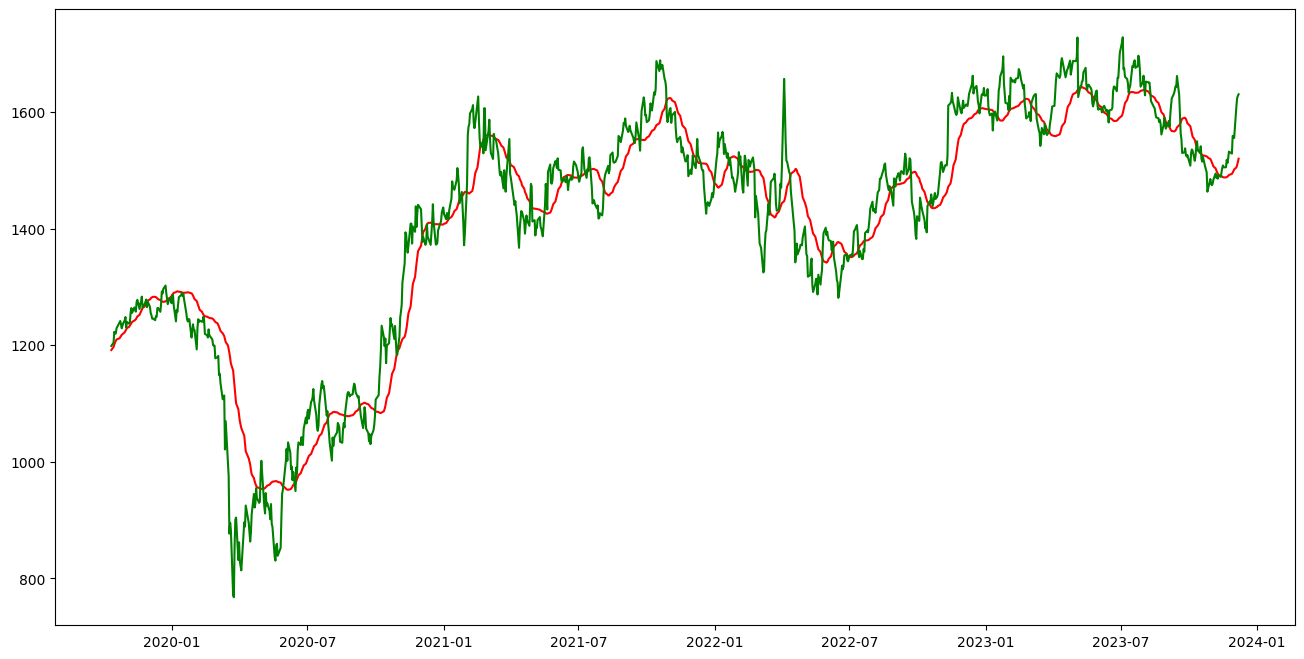

In [161]:
# y_predicted=pd.DataFrame(y_predicted)
# print(predict_date.head())
# print(y_predicted.head())

# y_test=pd.DataFrame(y_test)
# y_test.reset_index()
# print(y_test.head())
# print(test_date.head())

plt.figure(figsize=(16,8))
plt.plot(predict_date,'r')
plt.plot(test_date,'g')
plt.show()

In [162]:
from sklearn.metrics import mean_squared_error
import math
# print(y_predicted.mean())
# print(y_test.mean())
# pe=((abs(y_test.mean()-y_predicted.mean()))/(y_predicted.mean()))*100
# print(pe)
mse=mean_squared_error(y_test,y_predicted)
rmse=math.sqrt(mse)
print(rmse)

62.49426171550181


In [163]:
print(test_date.tail(10))
print(predict_date.tail(10))

                  Close
Date                   
2023-11-23  1521.300049
2023-11-24  1532.099976
2023-11-28  1528.650024
2023-11-29  1559.150024
2023-11-30  1558.800049
2023-12-01  1555.400024
2023-12-04  1609.400024
2023-12-05  1623.699951
2023-12-06  1627.800049
2023-12-07  1630.449951
                  Close
Date                   
2023-11-23  1490.480103
2023-11-24  1492.013428
2023-11-28  1493.866455
2023-11-29  1496.007324
2023-11-30  1498.539185
2023-12-01  1501.531982
2023-12-04  1504.962036
2023-12-05  1509.037354
2023-12-06  1513.974854
2023-12-07  1519.884277
